In [128]:
#  import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Data Collection Part

In [130]:
 # load dataset 
df=pd.read_csv('googleplaystore.csv')

In [132]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning Part

In [134]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [136]:
## check   decription of data
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [138]:
##  check for null value in each columns
df.isnull().sum()     

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [140]:
##    here in the rating columns we have so many null values so we have to handle it 
## lets make a copy of it so that data not in mess
df1=df.copy()
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

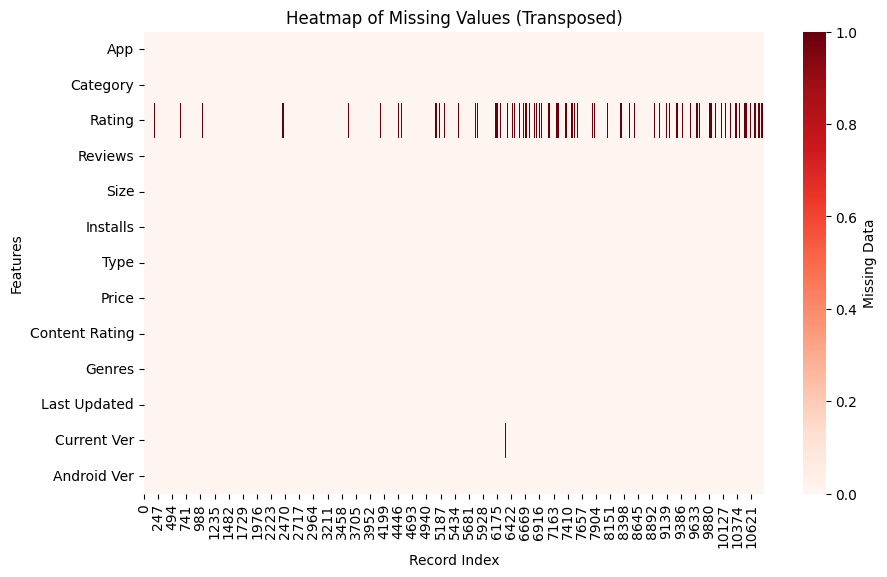

In [142]:
##  Visualizing Missing Data using a seaborn heatmap.

plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna().transpose(),
    cmap="Reds",
    cbar_kws={'label': 'Missing Data'}
    
)
plt.title("Heatmap of Missing Values (Transposed)")
plt.xlabel("Record Index")
plt.ylabel("Features")
plt.show()

In [144]:
#  1 procces   Drop Missing Values
##    here in the rating columns we have so many null values so we have to handle it 
## lets make a copy of it so that data not in mess
df1=df.copy()
print(df1.isnull().sum()) # before 
df1.dropna(inplace=True)
df1.isnull().sum() # after 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
# 2  process   Fill/Impute Missing Values
def fill_missing_values(df, numerical_cols=[], categorical_cols=[], strategy='mean'):
    """
    Fills missing values in a DataFrame for given columns.

    Parameters:
    df               : DataFrame to process (will not modify original)
    numerical_cols   : list of numerical column names
    categorical_cols : list of categorical column names
    strategy         : 'mean', 'median', or 'mode' for numerical columns

    Returns:
    A new DataFrame with missing values filled
    """
   
    for col in numerical_cols:
        if strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif strategy == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])

    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df




In [22]:
df2=df.copy()

numerical = ['Rating']
categorical = ['Current Ver', 'Android Ver', 'Content Rating', 'Type']
print(df2.isnull().sum())
    # function call 
df2 = fill_missing_values(df, numerical_cols=numerical, categorical_cols=categorical, strategy='mean')

## verify the data 
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

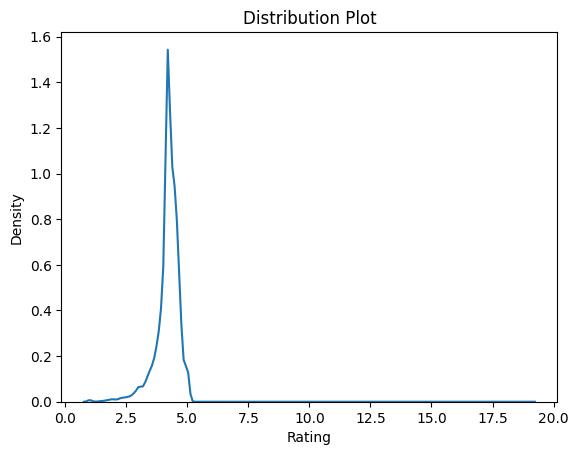

In [24]:
## check for nomalilty of my data
sns.kdeplot(df['Rating'])
plt.title('Distribution Plot')
plt.show()

# I chose to use the mode strategy to fill missing values in the Rating column because it's robust and preserves the original shape of the data.

In [26]:
## Using SimpleImputer from sklearn
mdl=SimpleImputer(strategy='most_frequent')
df[['Rating']] = mdl.fit_transform(df[['Rating']])
df[['Type']] = mdl.fit_transform(df[['Type']])
df[['Android Ver']] = mdl.fit_transform(df[['Android Ver']])
df[['Current Ver']] = mdl.fit_transform(df[['Current Ver']])
df[['Content Rating']] = mdl.fit_transform(df[['Content Rating']])
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [28]:
# check the statistical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Duplicate Removal

In [30]:
## Handling Duplicates
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [32]:
## before 
df.duplicated().sum()

np.int64(483)

In [34]:
# remove duplicate data and do reset index
df = df.drop_duplicates().reset_index(drop=True)
# verify the data
df.duplicated().sum()


np.int64(0)

## Outliers Detection And Handling Part

<Axes: xlabel='Rating', ylabel='Count'>

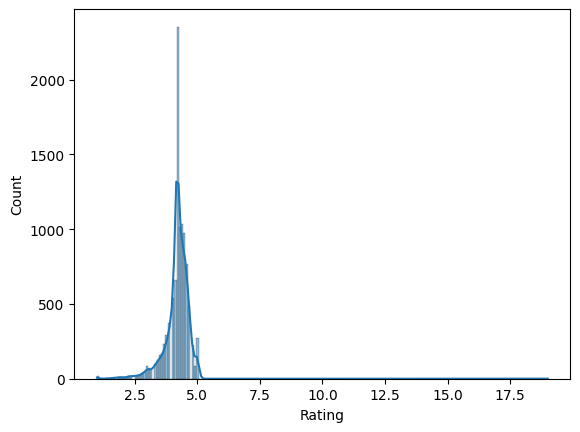

In [70]:
## Detect outliers 
sns.histplot(df["Rating"],kde=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB
None


<Axes: ylabel='Rating'>

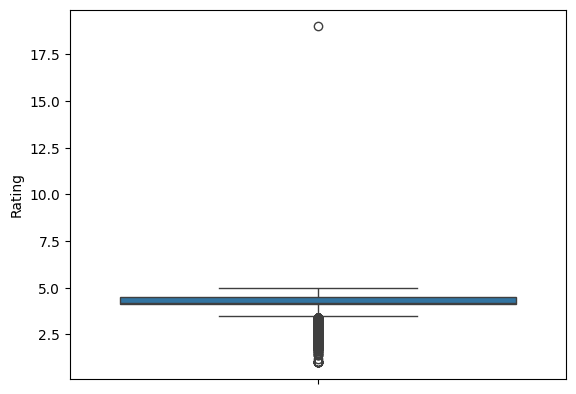

In [62]:
##  numerical data only rating 
# using boxplot
print(df.info())
sns.boxplot(df['Rating'])

In [76]:
## using interqualite range
Q1=df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1.1M,"100,000+",Free,0,Everyone,Auto & Vehicles,"April 27, 2018",1.4,4.0.3 and up
159,Cloud of Books,BOOKS_AND_REFERENCE,3.3,1862,19M,"1,000,000+",Free,0,Everyone,Books & Reference,"April 27, 2018",2.2.5,4.1 and up
176,Free Book Reader,BOOKS_AND_REFERENCE,3.4,1680,4.0M,"100,000+",Free,0,Everyone,Books & Reference,"August 20, 2016",3.05,4.0.3 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10275,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72M,"50,000+",Free,0,Everyone,Tools,"February 23, 2018",2.4.1,4.4 and up
10283,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10284,FreedomPop Diagnostics,TOOLS,2.9,452,7.0M,"100,000+",Free,0,Everyone,Tools,"July 17, 2017",1.03.123.0713,4.0.3 and up
10336,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up


In [146]:
# check statistical data in Rating column
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

count    9037.000000
mean        4.290787
std         0.257637
min         3.700000
25%         4.193338
50%         4.300000
75%         4.500000
max         4.900000
Name: Rating, dtype: float64


<Axes: ylabel='Rating'>

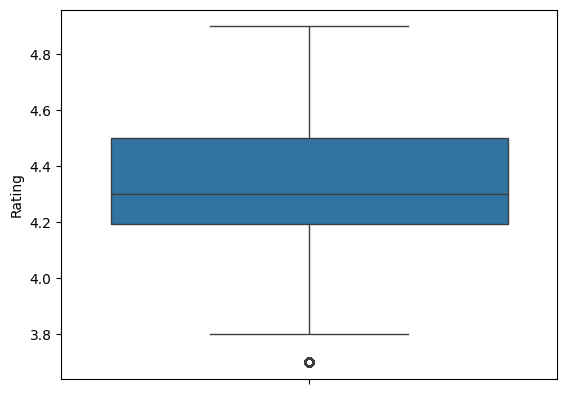

In [122]:
## Hadles outliers 

## trimming  using outliers percentile
max_limit = df["Rating"].quantile(0.99)
min_limit = df["Rating"].quantile(0.1)
new_data = df[(df["Rating"]>min_limit) & (df["Rating"]<max_limit)]
print(new_data['Rating'].describe())

sns.boxplot(new_data['Rating'])

count    10358.000000
mean         4.230965
std          0.358435
min          3.500000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.100000
Name: Rating, dtype: float64


<Axes: ylabel='Rating'>

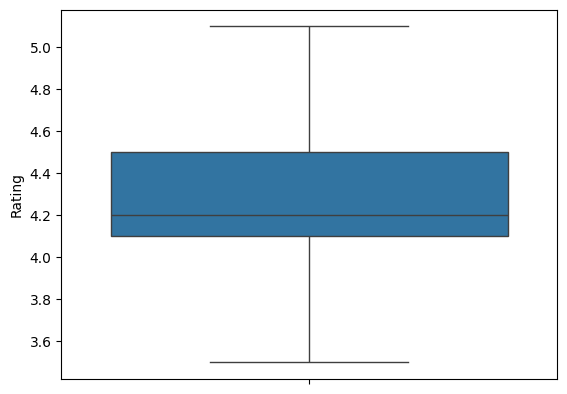

In [124]:
## caping using IQR rule 

Q1=df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Rating'] = df['Rating'].apply(lambda x: 
                                  lower_bound if x < lower_bound 
                                  else upper_bound if x > upper_bound 
                                  else x)
## verify the result
print(df['Rating'].describe())
sns.boxplot(df['Rating'])